## Import important libraries

In [1]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')

## Import and Describe Data

In [2]:
drugs = pd.read_csv('/content/drug200.csv')
drugs.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
2,47,M,LOW,HIGH,10.114,drugC
13,74,F,LOW,HIGH,20.942,DrugY
128,47,M,LOW,NORMAL,33.542,DrugY
99,15,F,HIGH,NORMAL,16.725,DrugY
178,39,M,NORMAL,HIGH,15.969,DrugY


**There are 6 variables in this data set:**

- 4 categorical variables,and
- 2 continuous variables.

  - 1- Age: Patient Age
  - 2- Sex: Gender of patient
  - 3- BP: Levels of Blood pressure
  - 4- cholesterol: Levels of cholesterol
  - 5- Na_to_K: Sodium to potassium ratio in blood
  - 6- Drug: Type of drug

  resource: [data description](https://www.kaggle.com/code/caesarmario/drug-classification-w-various-ml-models/input)

In [3]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# check null values
drugs.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


## Exploratory Data Analysis

### Numerical Features
   - Age
   - Na_to_K

In [5]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
skewAge = drugs.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)


Age skewness:  0.03030835703000607


<Axes: xlabel='Age', ylabel='Density'>

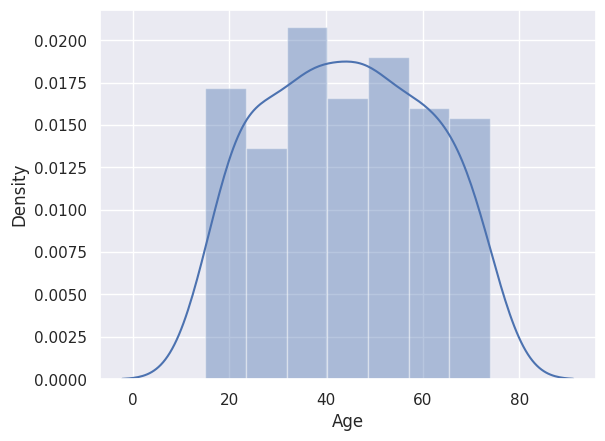

In [7]:
sns.distplot(drugs['Age'])

In [8]:
skewNatoK = drugs.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


<Axes: xlabel='Na_to_K', ylabel='Density'>

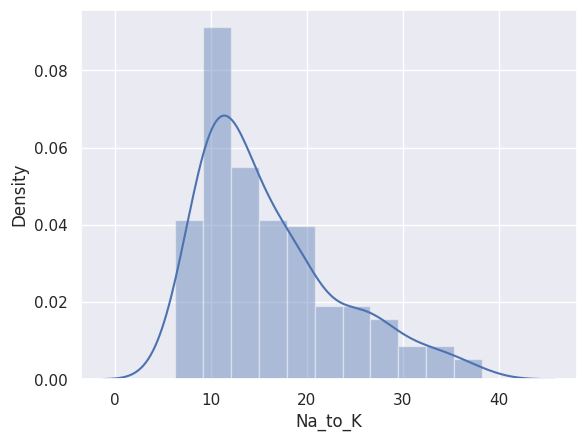

In [9]:
sns.distplot(drugs['Na_to_K'])

### Categorical Features
  - Drug
  - Sex
  - BP
  - Cholesterol

In [10]:
drugs.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


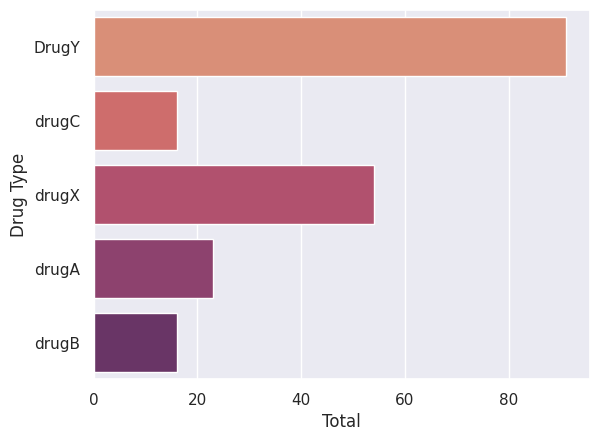

In [11]:
# Drug Type Distribution
sns.set_theme(style = "darkgrid")
sns.countplot(y = "Drug", data = drugs, palette = "flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [12]:
drugs.Sex.value_counts()

,count
Sex,
M,104
F,96


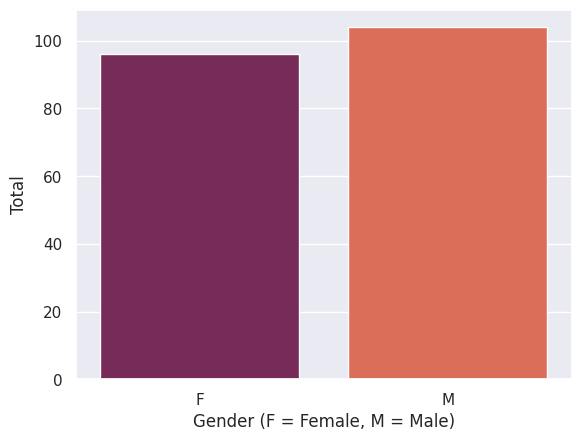

In [13]:
# Gender Distribution
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Sex", data = drugs, palette = "rocket")
plt.xlabel('Gender (F = Female, M = Male)')
plt.ylabel('Total')
plt.show()

In [14]:
drugs.BP.value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


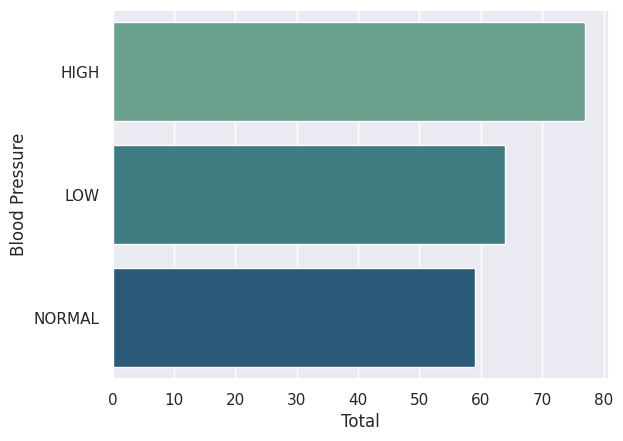

In [15]:
# Blood Pressure Distribution
sns.set_theme(style = "darkgrid")
sns.countplot(y = "BP", data = drugs, palette = "crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

In [16]:
drugs.Cholesterol.value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


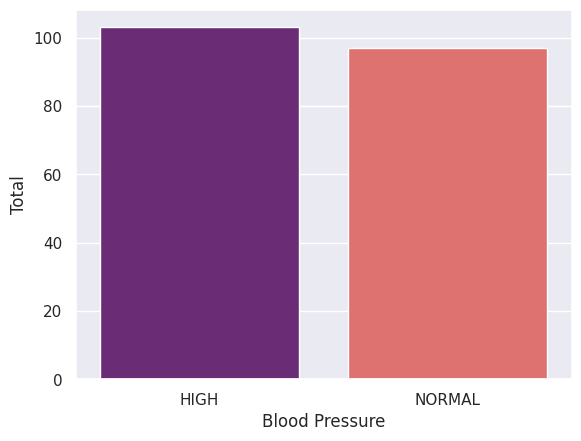

In [17]:
# Cholesterol Distribution
sns.set_theme(style = "darkgrid")
sns.countplot(x = "Cholesterol", data = drugs, palette = "magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

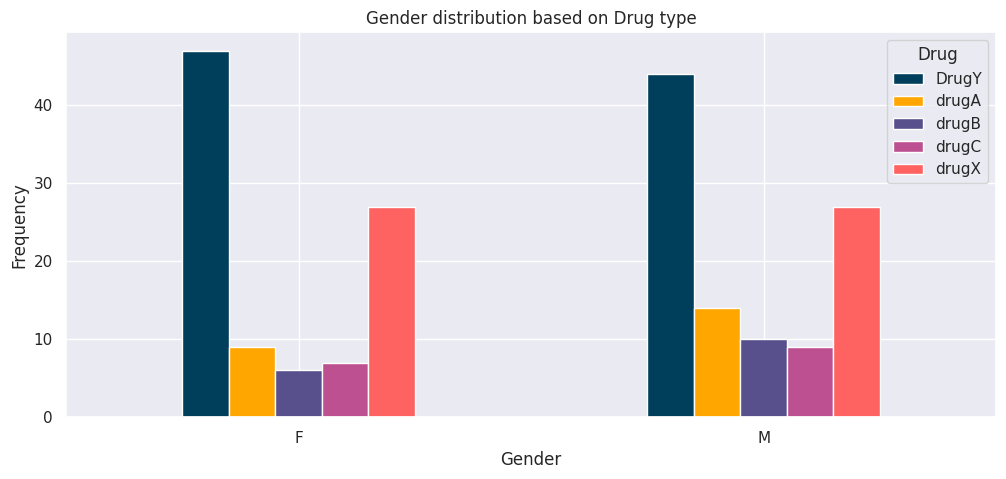

In [18]:
# Distribution of gender based on drug type
pd.crosstab(drugs.Sex, drugs.Drug).plot(kind = "bar", figsize = (12, 5),
                                        color = ['#003f5c', '#ffa600', '#58508d', '#bc5090', '#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

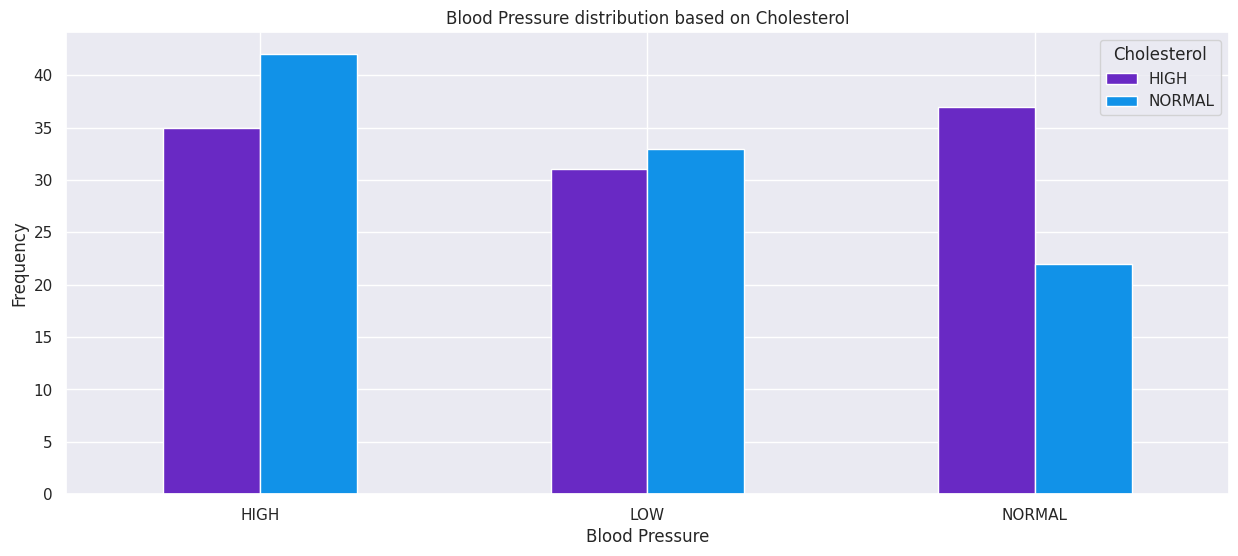

In [19]:
# Distrbution of blood pressure based on cholesterol
pd.crosstab(drugs.BP, drugs.Cholesterol).plot(kind = "bar", figsize = (15, 6),
                                              color = ['#6929c4', '#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## Dataset Preparation
- 2 ways to deal with categorical data and numerical data
- **1- convert numerical columns such as age and Na_to_K to categories and then convert all categories into one-hot-encoding**

  - Age will be divided into 7 age categories:

    - Below 20 y.o.
    - 20 - 29 y.o.
    - 30 - 39 y.o.
    - 40 - 49 y.o.
    - 50 - 59 y.o.
    - 60 - 69 y.o.
    - Above 70.

  - The chemical ratio will be divided into 4 categories:

    - Below 10.
    - 10 - 20.
    - 20 - 30.
    - Above 30.
- **2- scale numerical column and encoding categorical columns**

In [20]:
new_drugs_df = drugs.copy()

In [21]:
# The age will be divided into 7 age categories
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
new_drugs_df['Age_binned'] = pd.cut(new_drugs_df['Age'], bins = bin_age, labels = category_age)
new_drugs_df = new_drugs_df.drop(['Age'], axis = 1)
new_drugs_df['Age_binned'].head()

,Age_binned
0,20s
1,40s
2,40s
3,20s
4,60s


In [22]:
# The chemical ratio will be divided into 4 categories
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
new_drugs_df['Na_to_K_binned'] = pd.cut(new_drugs_df['Na_to_K'], bins = bin_NatoK, labels = category_NatoK)
new_drugs_df = new_drugs_df.drop(['Na_to_K'], axis = 1)
new_drugs_df['Na_to_K_binned'].head()

,Na_to_K_binned
0,20-30
1,10-20
2,10-20
3,<10
4,10-20


### splitting Dataset

In [23]:
from sklearn.model_selection import train_test_split

x = new_drugs_df.drop(["Drug"], axis=1)
y = new_drugs_df["Drug"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape

((140, 5), (140,))

### Feature Engineering
  - using one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction

In [24]:
x_train = pd.get_dummies(x_train).astype(int)
x_test = pd.get_dummies(x_test).astype(int)
x_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


### oversampling technique

In [25]:
# SMOTE
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(x_train, y_train)

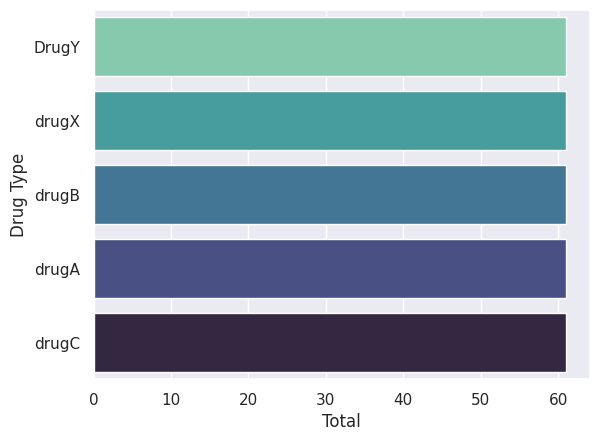

In [26]:
sns.set_theme(style = "darkgrid")
sns.countplot(y = y_train, data = new_drugs_df, palette = "mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

### scale numerical column and encoding categorical columns

In [47]:
new_drugs_df_1 = drugs.copy()
x_1 = new_drugs_df_1.drop(["Drug"], axis=1)
y_1 = new_drugs_df_1["Drug"]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size = 0.3, random_state = 0)

# encode categorical columns by one hot encoding
x_train_1 = pd.get_dummies(x_train_1).astype(int)
x_test_1 = pd.get_dummies(x_test_1).astype(int)

# scale numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_1[['Age', 'Na_to_K']] = scaler.fit_transform(x_train_1[['Age', 'Na_to_K']])
x_test_1[['Age', 'Na_to_K']] = scaler.transform(x_test_1[['Age', 'Na_to_K']])

# oversampling technique
X_train_1, y_train_1 = SMOTE().fit_resample(x_train_1, y_train_1)

## Models

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('the result of the first way of data preprocessing')
LRclassifier = LogisticRegression(solver = 'liblinear', max_iter = 5000)
LRclassifier.fit(X_train, y_train)
y_pred = LRclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))
print('\n')

print('the result of the second way of data preprocessing')
LRclassifier = LogisticRegression(solver = 'liblinear', max_iter = 5000)
LRclassifier.fit(X_train_1, y_train_1)
y_pred = LRclassifier.predict(x_test_1)
print(classification_report(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))
LRAcc = accuracy_score(y_pred,y_test_1)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

the result of the first way of data preprocessing
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 85.00%


the result of the second way of data preprocessing
              precision    recall  f1-score   support

       DrugY       1.00      0.60      0.75        30
       drugA       0.67      0.80      0.73         5
       drugB       0.50      1.00      0.67         3
       drugC       0.57      1.00      0.73         4
      

### K Neighbours

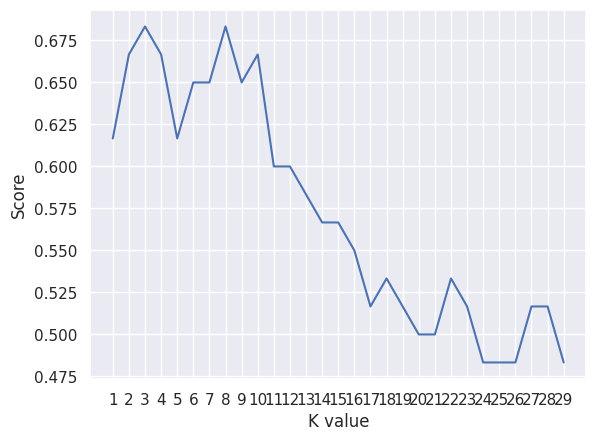

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# choose the number of neighbors
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [53]:
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

KNN Acc Max 68.33%


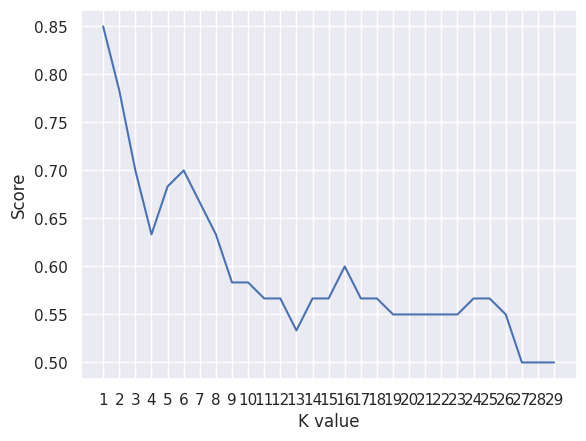

In [54]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train_1, y_train_1)
    scoreListknn.append(KNclassifier.score(x_test_1, y_test_1))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [55]:
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

KNN Acc Max 85.00%


In [56]:
KNclassifier = KNeighborsClassifier(n_neighbors = 1)
KNclassifier.fit(X_train_1, y_train_1)

y_pred = KNclassifier.predict(x_test_1)

print(classification_report(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test_1)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.83      1.00      0.91         5
       drugB       0.60      1.00      0.75         3
       drugC       0.80      1.00      0.89         4
       drugX       0.78      1.00      0.88        18

    accuracy                           0.85        60
   macro avg       0.80      0.94      0.85        60
weighted avg       0.89      0.85      0.85        60

[[21  1  2  1  5]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
K Neighbours accuracy is: 85.00%


###  Decision Tree

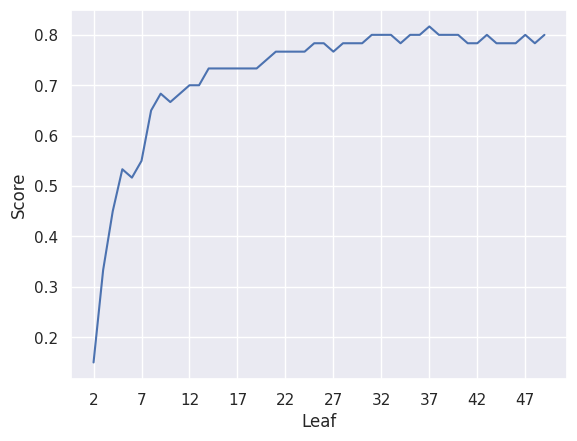

DT Acc Max 81.67%


In [57]:
from sklearn.tree import DecisionTreeClassifier
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes = i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

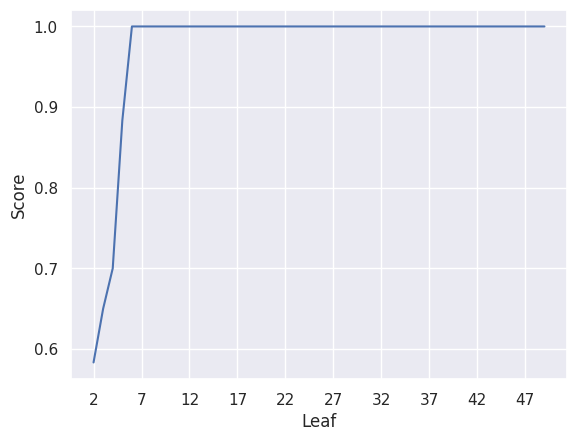

DT Acc Max 100.00%


In [58]:
from sklearn.tree import DecisionTreeClassifier
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes = i)
    DTclassifier.fit(X_train_1, y_train_1)
    scoreListDT.append(DTclassifier.score(x_test_1, y_test_1))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train_1, y_train_1)

y_pred = DTclassifier.predict(x_test_1)

print(classification_report(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test_1)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 100.00%


In [60]:
y_pred = DTclassifier.predict(X_train_1)
accuracy_score(y_pred,y_train_1)

1.0